# CIFAR 10 image identification with Neural Networks

In [0]:
# install keras first
!pip install dill
!pip install -q keras

In [0]:
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"


In [0]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [0]:
batch_size = 256
num_classes = 10
'''
epochs_longrun = 500
save_dir = "/work"
res_dir = "/results"
model_name = 'convnet_cifar10'
'''

'\nepochs_longrun = 500\nsave_dir = "/work"\nres_dir = "/results"\nmodel_name = \'convnet_cifar10\'\n'

In [0]:
from __future__ import print_function
import tensorflow as tf
import keras
from keras.datasets import cifar10
#from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils import to_categorical
from keras.models import load_model

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import warnings
warnings.filterwarnings('ignore')

In [0]:
tf.reset_default_graph()
tf.set_random_seed(343)
np.random.seed(343)
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [0]:
# Convert class vectors to binary class matrices.
y_train_c = to_categorical(y_train, num_classes)
y_test_c = to_categorical(y_test, num_classes)
#Normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

### Prediction with Random Forest

In [0]:
x = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))
print('x shape:', x.shape)
print('y shape:', y.shape)

x shape: (60000, 3, 32, 32)
y shape: (60000, 1)


In [0]:
#Let's see how good is RandomForest
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
logit = RandomForestClassifier()
# tree = DecisionTreeClassifier()
# knn = KNeighborsClassifier(leaf_size=15)
x_train_1 = x_train.reshape(x_train.shape[0],3*32*32)
x_test_1 = x_test.reshape(x_test.shape[0],3*32*32)
# knn.fit(x_train_1, y_train)
logit.fit(x_train_1, y_train)
print ("Random Forest Classifier Accuracy: {}%".format(logit.score(x_test_1, y_test)*100))

Random Forest Classifier Accuracy: 36.18%


##Classification Report

In [0]:
%%time
from sklearn.metrics import classification_report
x_1 = x.reshape(x.shape[0],3*32*32)
predicted = logit.predict(x_1)
print (classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6000
           1       0.87      0.91      0.89      6000
           2       0.84      0.87      0.86      6000
           3       0.87      0.87      0.87      6000
           4       0.87      0.88      0.88      6000
           5       0.91      0.87      0.89      6000
           6       0.91      0.89      0.90      6000
           7       0.92      0.88      0.90      6000
           8       0.93      0.91      0.92      6000
           9       0.92      0.89      0.91      6000

   micro avg       0.89      0.89      0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000

CPU times: user 677 ms, sys: 3.95 ms, total: 681 ms
Wall time: 685 ms


##Confusion Matrix

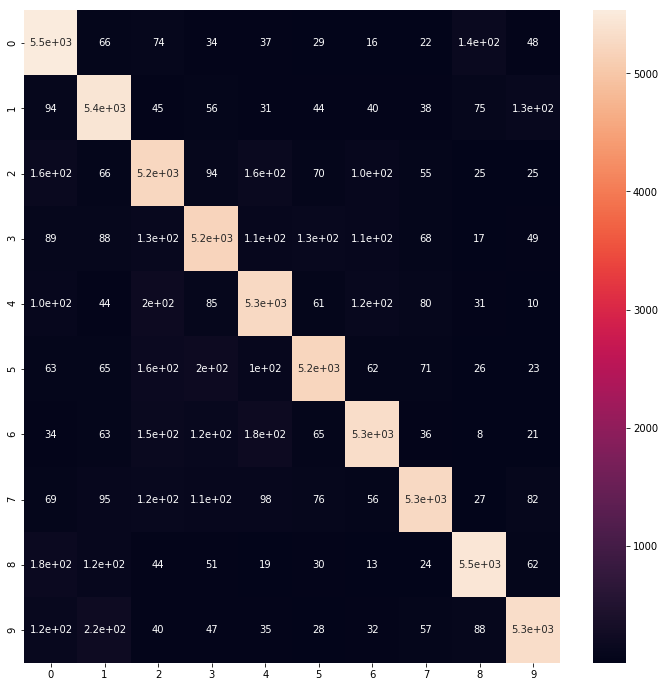

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
labels = np.unique(y)
cm = confusion_matrix(y, predicted,labels)

plt.figure(figsize = (12,12))
df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])

ax=sn.heatmap(df_cm, annot=True)

In [0]:
# Let's see what values are in the label y_train
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Prediction with Feedforward Neural Networks

In [0]:
#Let's review how MLPClassifier got trained and do prediction
x_train_1 = x_train.reshape(x_train.shape[0],3*32*32)
x_test_1 = x_test.reshape(x_test.shape[0],3*32*32)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(40), activation='relu')
mlp.fit(x_train_1, y_train)
score =mlp.score(x_test_1, y_test)
print('MLP NN score: %.2f%%' %(score*100))

MLP NN score: 44.64%


## Combining the training and test data back into one data

In [0]:
def cifar_grid(X,Y,inds,n_col):#print out randomly selected images and their labels
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig = plt.figure(figsize=(10, 10))
  
# align labels in the right order, i.e., from 0 to 9
  clabels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
      if i_inds < N:
        rgb = X[[i_data,...]]
        label =clabels[Y[i_data][0]]
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        fig.add_subplot(n_row,n_col, i_inds+1)
        plt.imshow(img, interpolation='nearest')
        plt.title("{}".format(label))
        
         
  fig.set_tight_layout(True)

[57151, 39537, 32914, 27756, 22456, 34838, 10162, 34966, 16268, 11558, 33857, 10899, 28411, 52721, 28663, 49026]
<class 'list'>


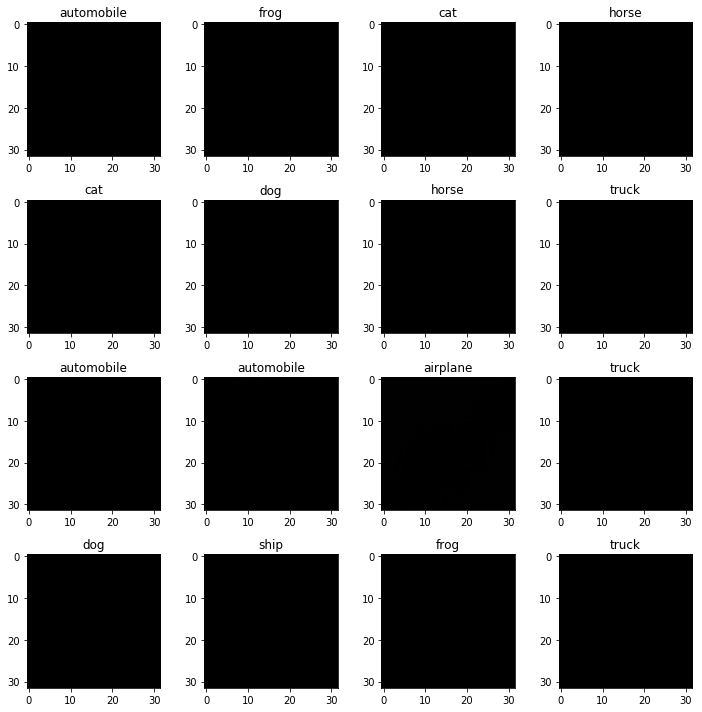

In [0]:
indices = [np.random.choice(range(len(x))) for i in range(16)]
print (indices)

cifar_grid(x,y,indices,4)

## Image identification with CNN

In [0]:
model = Sequential()

model.add(Conv2D(24, kernel_size=(3, 3), activation='relu',
                 input_shape=x_train.shape[1:]))
model.add(Conv2D(24, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.75))

model.add(Conv2D(24, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(24, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(3072, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3072, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='relu'))


opt = Adam(lr=0.000005, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 30, 30)        672       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 28, 28)        5208      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 14, 14)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 14, 14)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 12, 12)        5208      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 6, 6)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 4, 4)          5208      
__________

In [0]:
print('Using real-time data augmentation.')

datagen = ImageDataGenerator(
	featurewise_center=False, 
	samplewise_center=False,  
	featurewise_std_normalization=False,
	samplewise_std_normalization=False, 
	zca_whitening=False, 
	rotation_range=0, 
	width_shift_range=0.1, 
	height_shift_range=0.1,
	horizontal_flip=True, 
	vertical_flip=False) 

datagen.fit(x_train)

Using real-time data augmentation.


In [0]:
%%time
#Let's train the model
epochs = 300
hist = model.fit_generator(datagen.flow(x_train, y_train_c,
    batch_size=batch_size,shuffle=True),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test_c),
    workers=4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/300
195/195 [==============================] - 33s 171ms/step - loss: 2.6179 - acc: 0.1128 - val_loss: 2.3198 - val_acc: 0.1000
Epoch 2/300
195/195 [==============================] - 24s 125ms/step - loss: 2.2713 - acc: 0.1339 - val_loss: 2.4612 - val_acc: 0.1000
Epoch 3/300
195/195 [==============================] - 25s 127ms/step - loss: 2.2355 - acc: 0.1549 - val_loss: 2.3859 - val_acc: 0.1000
Epoch 4/300
195/195 [==============================] - 26s 135ms/step - loss: 2.2438 - acc: 0.1434 - val_loss: 2.3834 - val_acc: 0.1000
Epoch 5/300
195/195 [==============================] - 25s 129ms/step - loss: 2.2033 - acc: 0.1689 - val_loss: 2.6097 - val_acc: 0.1000
Epoch 6/300
195/195 [==============================] - 24s 126ms/step - loss: 2.1950 - acc: 0.1711 - val_loss: 4.0972 - val_acc: 0.1073
Epoch 7/300
195/195 [==============================] - 27s 137ms/step - loss: 2.2472 - acc: 0.1391 - val_loss: 2.3326 - val_acc: 0.1023


In [0]:
scores = model.evaluate(x_test, y_test_c, verbose=0)
print("CNN score: %.2f%%" % (scores[1]*100))

CNN score: 12.19%
CNN score: 12.19%


In [0]:
#print out randomly selected images(black/red labl-->correct/wrong prediction )
def cifar_grid_c(X,Y,inds,n_col, predictions=None):
  if predictions is not None:
    if Y.shape != predictions.shape:
      print("Predictions must equal Y in length!")
      return(None)
  N = len(inds)
  n_row = int(ceil(1.0*N/n_col))
  fig, axes = plt.subplots(n_row,n_col,figsize=(10,10))
  
#  clabels = labels["label_names"]
  clabels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  print(type(clabels))
  for j in range(n_row):
    for k in range(n_col):
      i_inds = (j*n_col)+k
      i_data = inds[i_inds]
      
     # axes[j][k].set_axis_off()
      if i_inds < N:
        rgb = X[[i_data,...]]
        #print(rgb.shape)
        img = rgb.reshape(3,32,32).transpose([1, 2, 0])
        axes[j][k].imshow(img, interpolation='nearest')
        label = clabels[np.argmax(Y[i_data,...])]
        axes[j][k].set_title(label)
        if predictions is not None:
          pred = clabels[np.argmax(predictions[i_data,...])]
          if label != pred:
            label += " n"
            axes[j][k].set_title(pred, color='red')            
  
  fig.set_tight_layout(True)

<class 'list'>


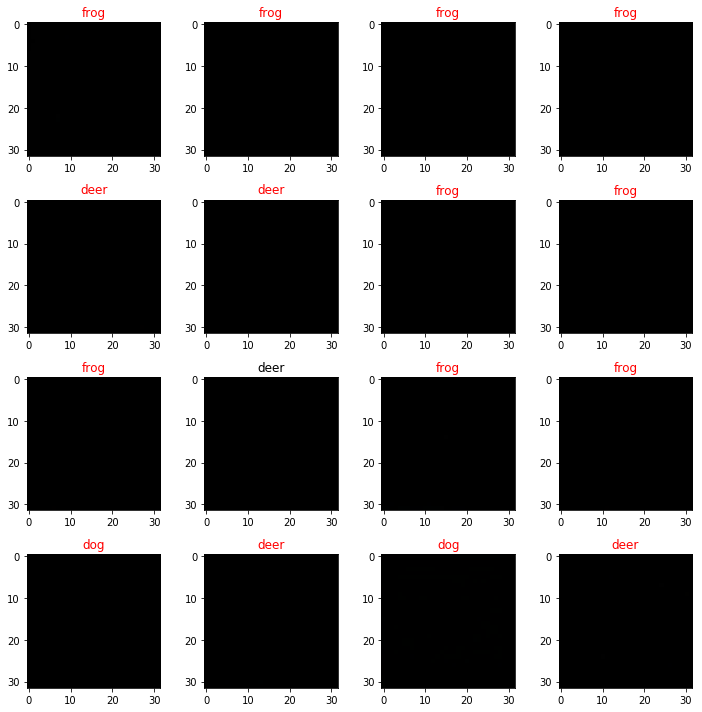

<class 'list'>


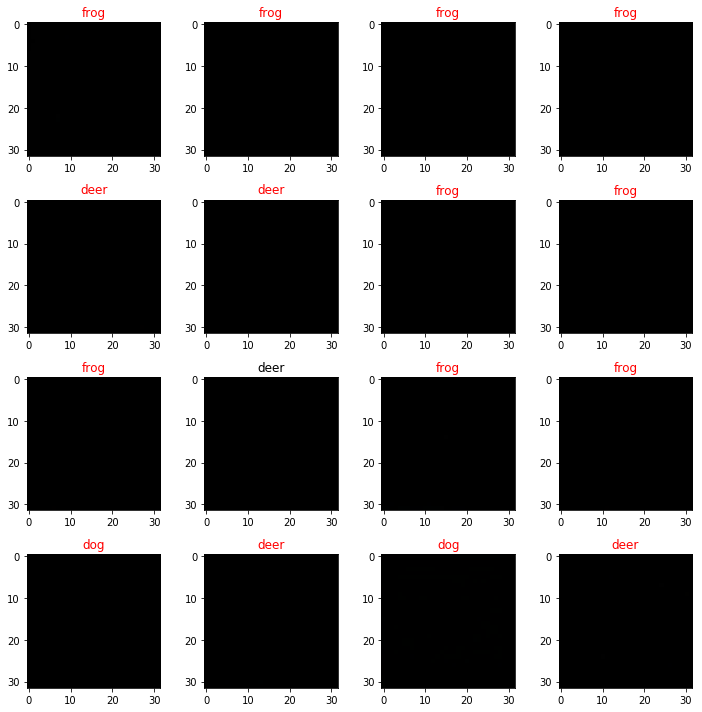

In [0]:
num_predictions = 16
predict_gen = model.predict_generator(datagen.flow(x_test, y_test_c,
    batch_size=batch_size, shuffle=False),
    steps=(x_test.shape[0] // batch_size)+1, workers=4)

indices = [np.random.choice(range(len(x_test))) 
           for i in range(num_predictions)]

cifar_grid_c(x_test,y_test_c,indices,4, predictions=predict_gen)

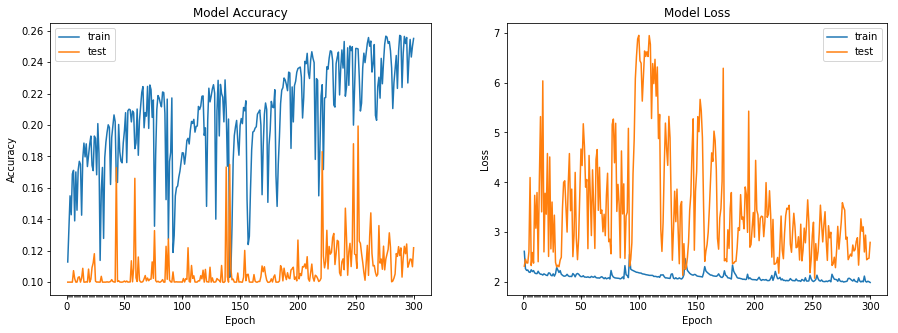

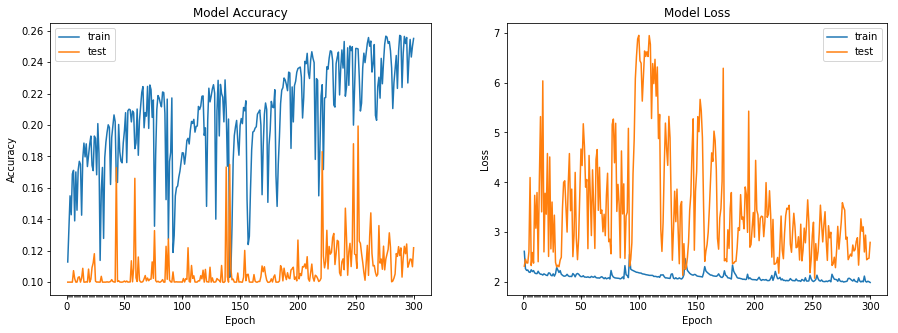

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'test'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'test'], loc='best')
    plt.show()
plot_model_history(hist)
    


In [0]:
import dill as pickle
with open("hist_path", 'wb') as f:
    pickle.dump(hist.history, f)

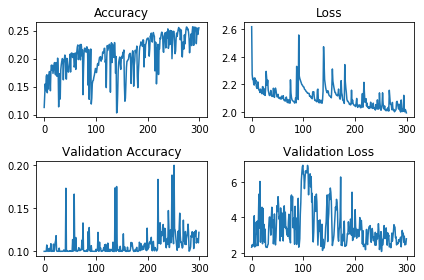

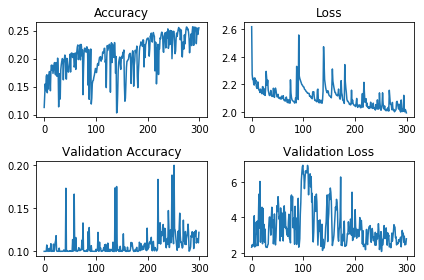

In [0]:
key2name = {'acc':'Accuracy', 'loss':'Loss', 
    'val_acc':'Validation Accuracy', 'val_loss':'Validation Loss'}
with open("hist_path", 'rb') as f:
  hist = pickle.load(f)
fig = plt.figure()

things = ['acc','loss','val_acc','val_loss']
for i,thing in enumerate(things):
  trace = hist[thing]
  plt.subplot(2,2,i+1)
  plt.plot(range(len(trace)),trace)
  plt.title(key2name[thing])

fig.set_tight_layout(True)
# fig